In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# read dataset

In [2]:
dataset_path = 'magic_dataset/magic04.csv'

columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']
df=pd.read_csv(dataset_path, names=columns, header=None)


In [3]:
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


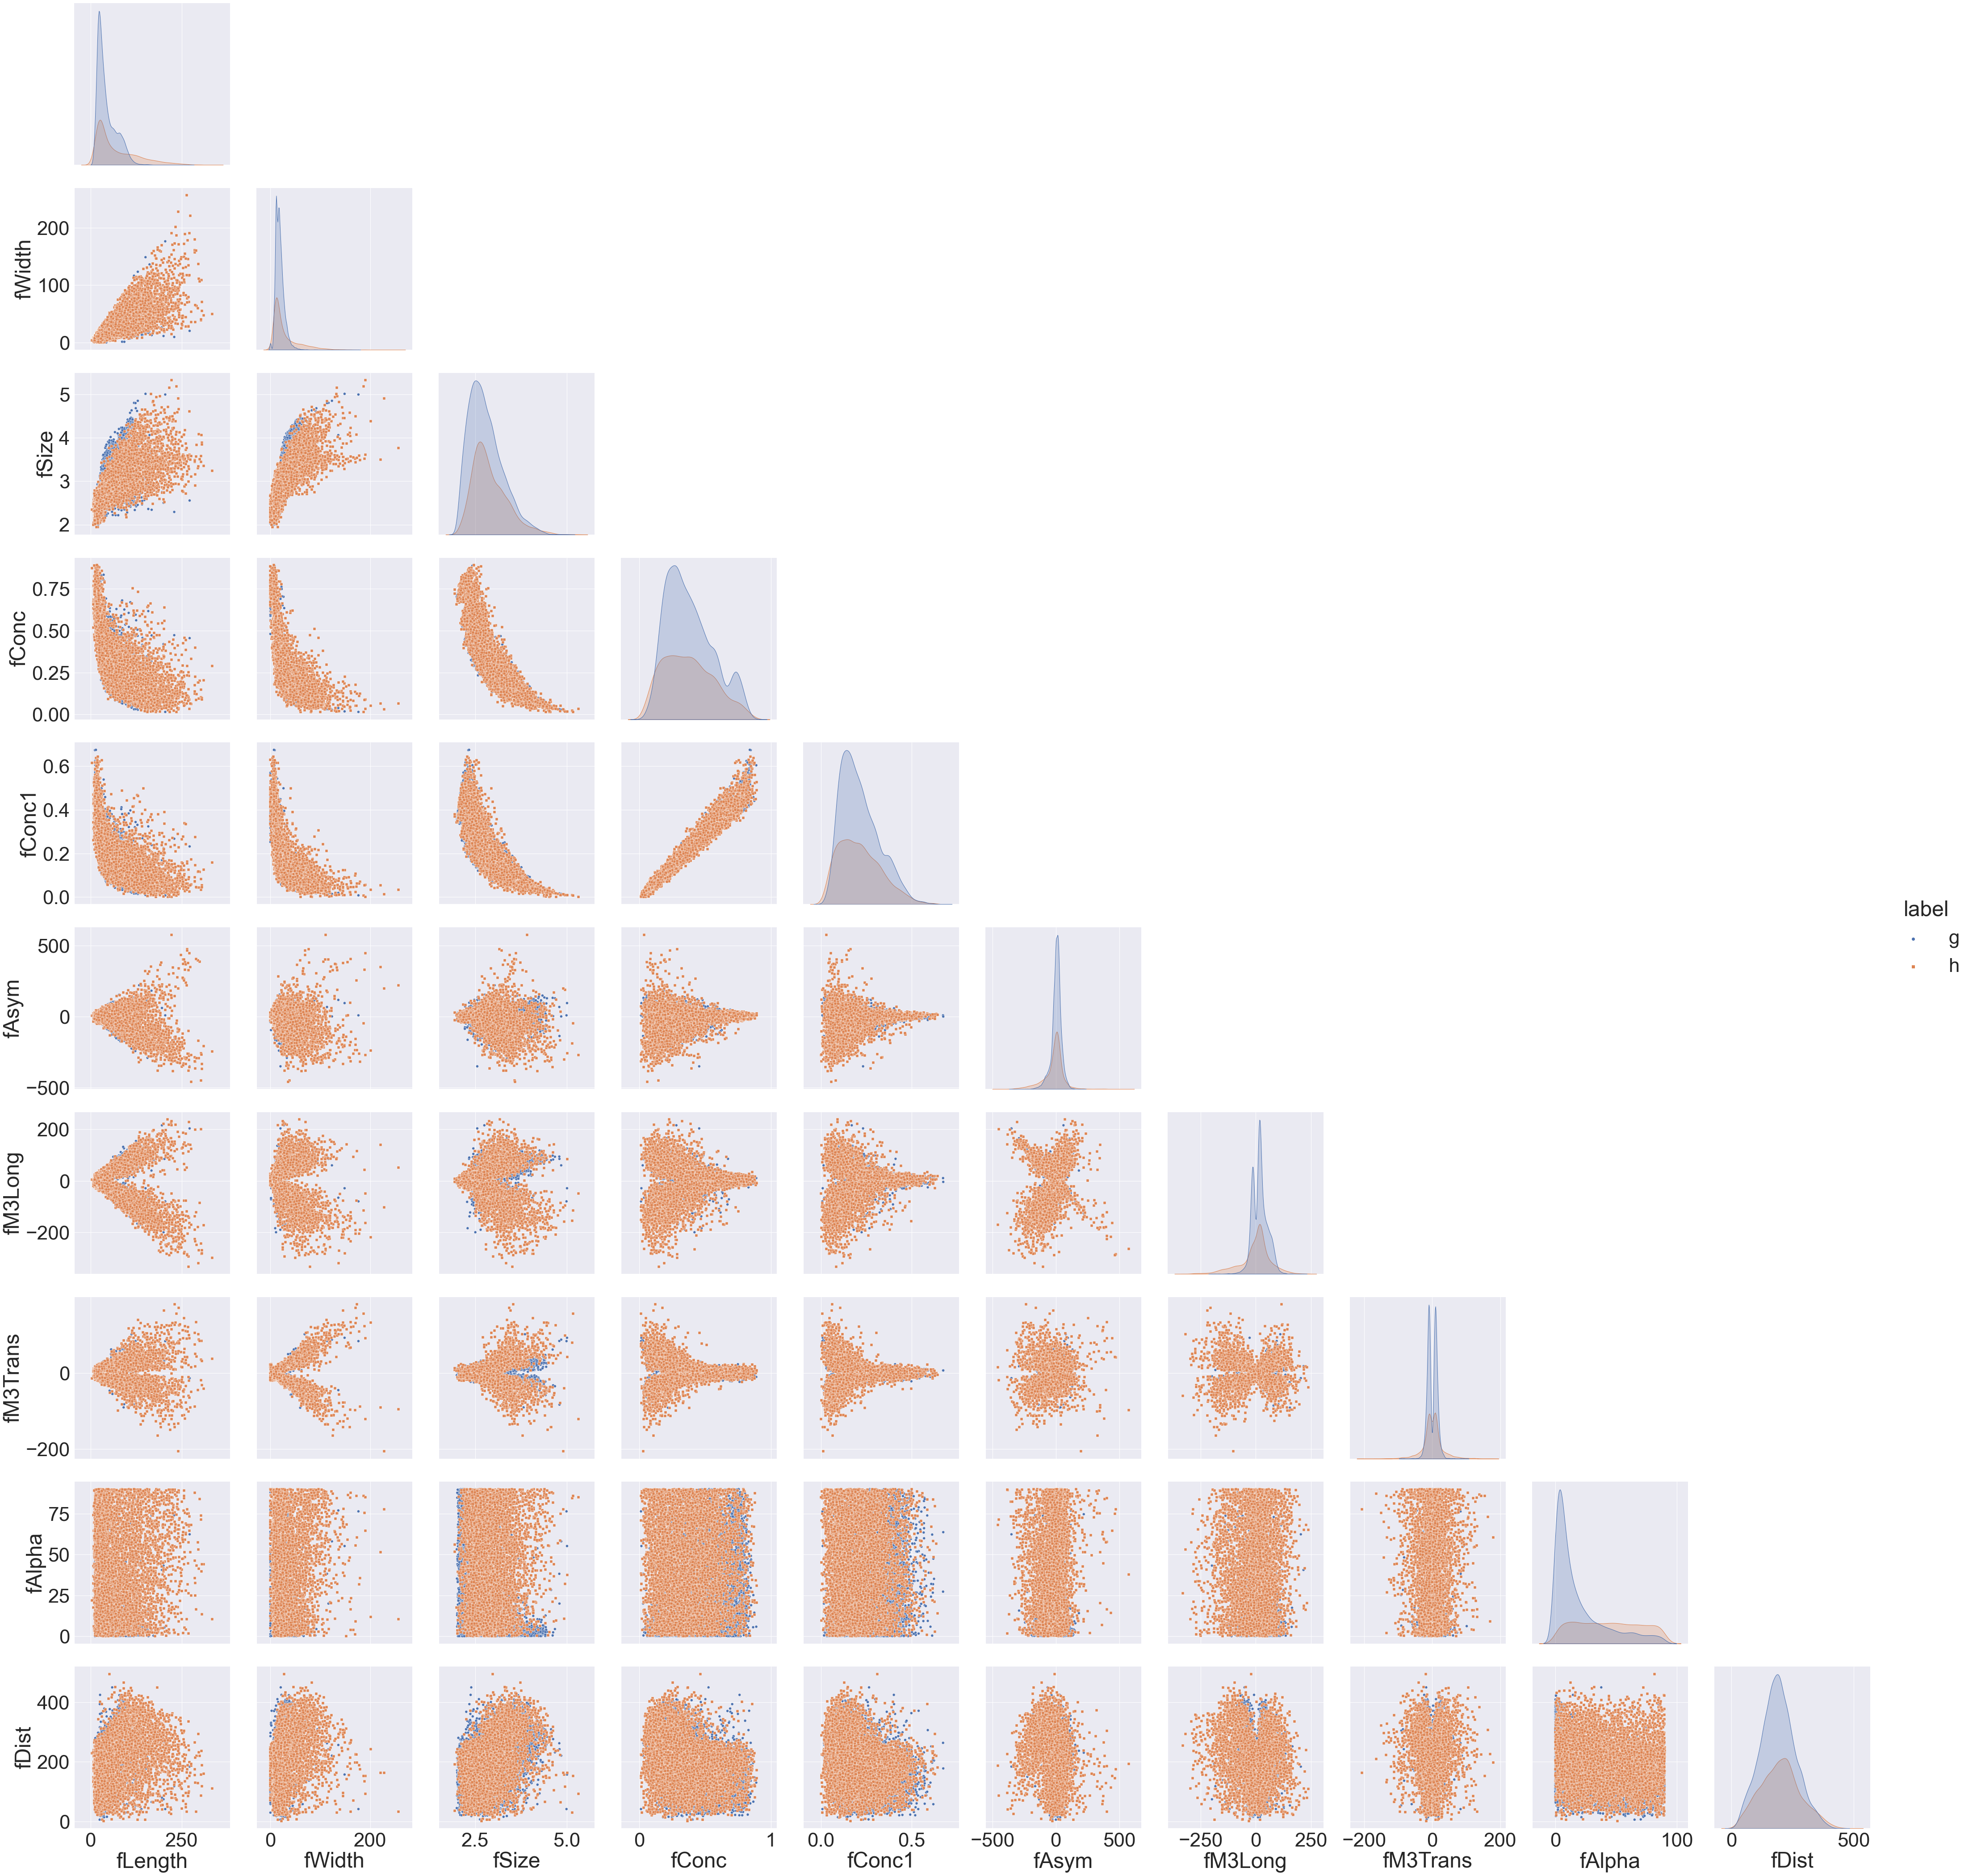

In [4]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=4)
x = sns.pairplot(df, hue="label", markers=["o", "s"], corner=True, height=6)
x.savefig('pairplot_features.png')
plt.show()

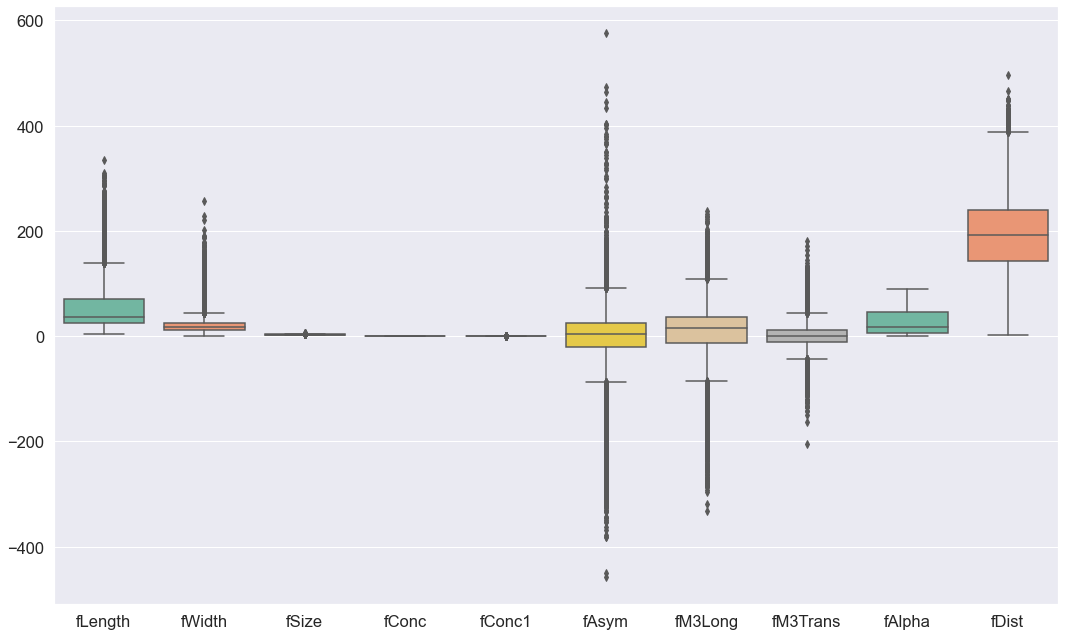

In [5]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=1.5)
x = sns.boxplot(data=df, orient="v", palette="Set2")

<Figure size 1296x792 with 0 Axes>

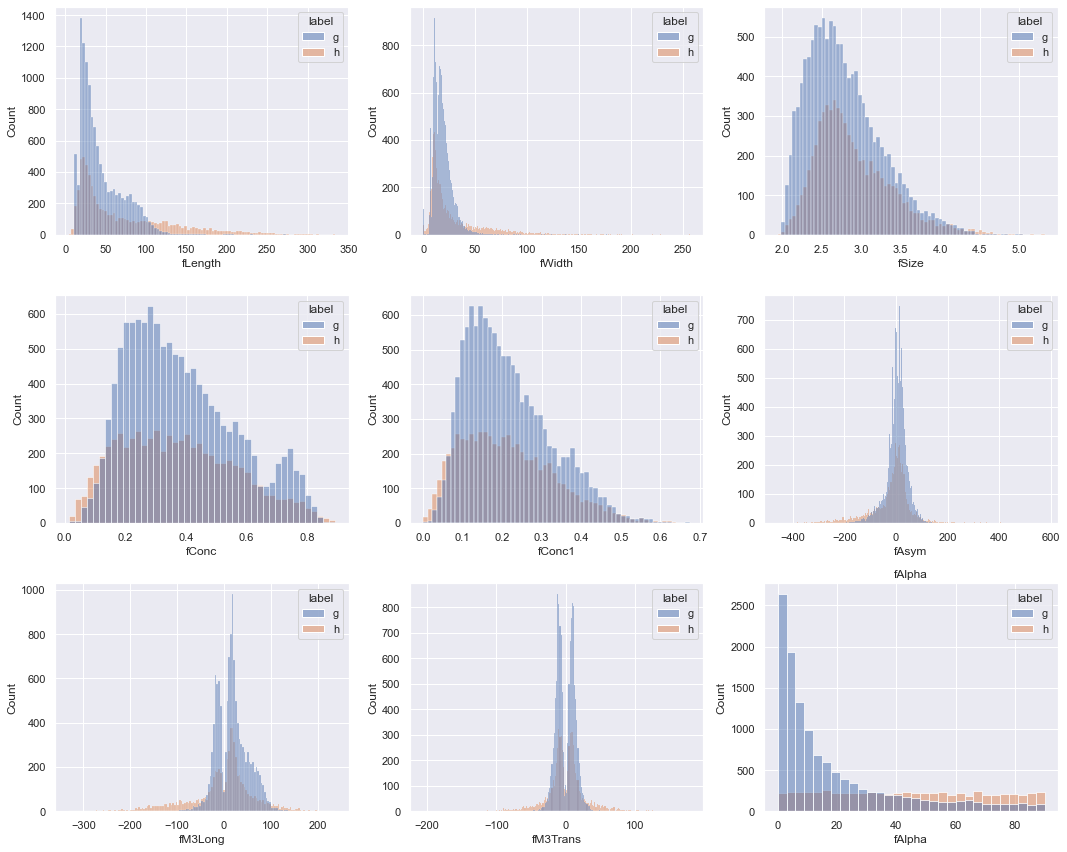

In [11]:
from scipy import stats
def remove_outliers(column):
    score = 3.5

    z_score = np.abs(stats.zscore(df[column].to_numpy()))
    mask = z_score > score
    mask_g = df.label == "g"
    mask_h = df.label == "h"
    print(f"Removed: {mask.sum()}")
    print(f"Removed {df[column][mask & mask_g].count()} gamma")
    print(f"Removed {df[column][mask & mask_h].count()} hadron")

    return mask

df_noLabel = df.iloc[:,:-1]
sns.set(font_scale=1)

fig = plt.figure()
fig,ax=plt.subplots(3,3, figsize=(15, 12))

i,j=0,0
for c in columns:
    sns.histplot(data=df, x=c, hue="label",ax=ax[i][j])
    plt.title(c)
    j=j+1
    if j==3:
        i = i+1
        j=0
    if i == 3:
        break
    
fig.tight_layout()
plt.show()


fLength
Removed: 270
Removed 4 gamma
Removed 266 hadron

fWidth
Removed: 345
Removed 11 gamma
Removed 334 hadron

fSize
Removed: 50
Removed 9 gamma
Removed 41 hadron

fConc
Removed: 0
Removed 0 gamma
Removed 0 hadron

fConc1
Removed: 27
Removed 11 gamma
Removed 16 hadron

fAsym
Removed: 278
Removed 7 gamma
Removed 271 hadron

fM3Long
Removed: 211
Removed 6 gamma
Removed 205 hadron

fM3Trans
Removed: 288
Removed 10 gamma
Removed 278 hadron

fAlpha
Removed: 0
Removed 0 gamma
Removed 0 hadron


<Figure size 1296x792 with 0 Axes>

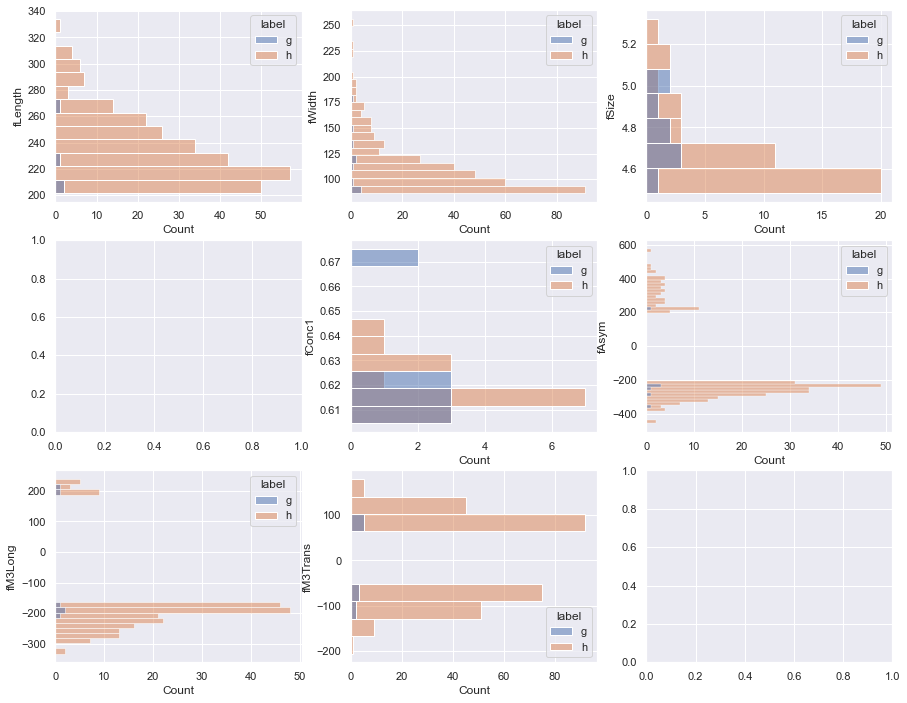

In [9]:
fig = plt.figure()
fig,ax=plt.subplots(3,3, figsize=(15, 12))

i,j=0,0
for c in columns:
    print()
    print(c)
    mask = remove_outliers(c)
    sns.histplot(data=df[mask], y=c, hue="label",ax=ax[i][j])

    j=j+1
    if j==3:
        i = i+1
        j=0
    if i == 3:
        break

plt.show()

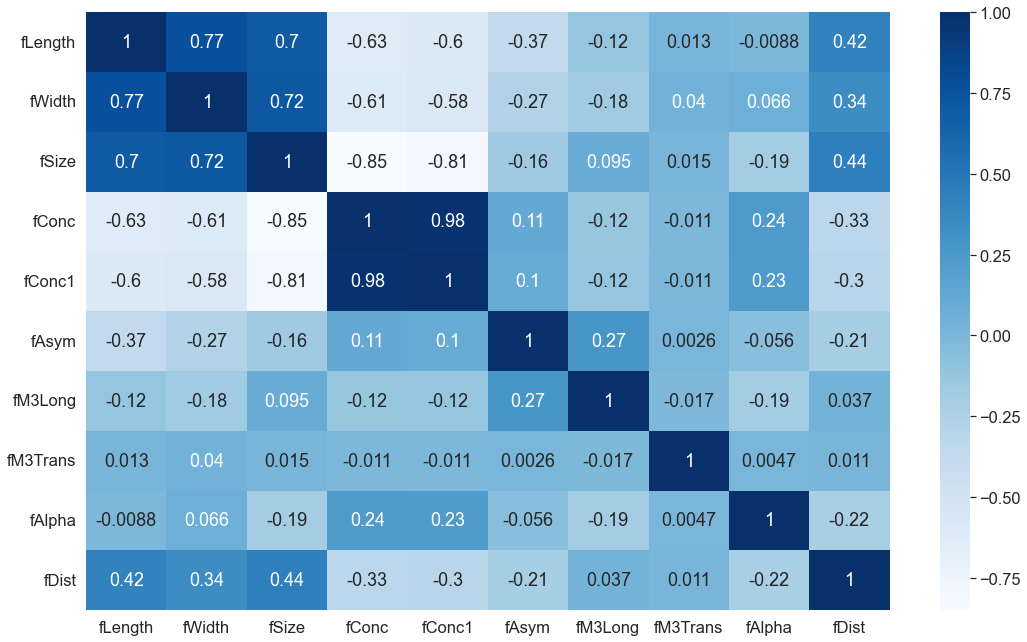

In [12]:
df = df.reset_index(drop=True)
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=1.5)
corr_matrix = df.corr(method='pearson')
x = sns.heatmap(data=corr_matrix, annot=True, cmap='Blues')
x.figure.savefig('correlation_features.pdf')

there is an high positive correlation between :
- **fConc**:    continuous  # ratio of sum of two highest pixels over fSize  
- **fConc1**:   continuous  # ratio of highest pixel over fSize 

but this is something we could expect since these features, by contruction, are related. However, before removing one of them I will check the model results

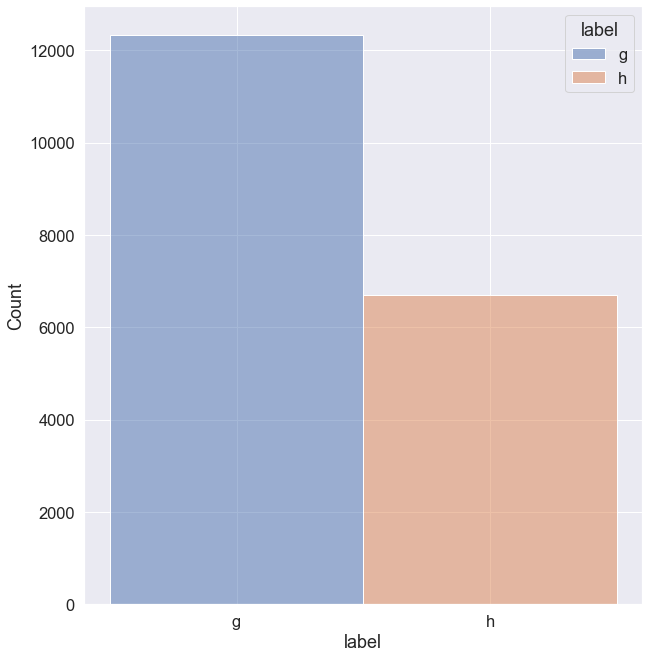

In [13]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set(font_scale=1.5)
x = sns.histplot(data=df, x="label", hue='label')
x.figure.savefig('classDistribution.pdf')
